### Requirements

In [177]:
# pip install matplotlib

# Preprocessing teams

### Import

In [178]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Fixed variables

In [179]:
# Dictionary of team codes
teams_dict = {
    'ATL': 'Atlanta_Hawks',
    'BOS': 'Boston_Celtics', 
    'BRK': 'Brooklyn_Nets', 
    'CHO': 'Charlotte_Hornets', 
    'CHI': 'Chicago_Bulls', 
    'CLE': 'Cleveland_Cavaliers', 
    'DAL': 'Dallas_Mavericks', 
    'DEN': 'Denver_Nuggets', 
    'DET': 'Detroit_Pistons', 
    'GSW': 'Golden_State_Warriors',
    'HOU': 'Houston_Rockets',
    'IND': 'Indiana_Pacers',
    'LAC': 'Los_Angeles_Clippers',
    'LAL': 'Los_Angeles_Lakers',
    'MEM': 'Memphis_Grizzlies',
    'MIA': 'Miami_Heat',
    'MIL': 'Milwaukee_Bucks',
    'MIN': 'Minnesota_Timberwolves',
    'NOP': 'New_Orleans_Pelicans',
    'NYK': 'New_York_Knicks',
    'OKC': 'Oklahoma_City_Thunder',
    'ORL': 'Orlando_Magic',
    'PHI': 'Philadelphia_76ers',
    'PHO': 'Phoenix_Suns',
    'POR': 'Portland_Trail_Blazers',
    'SAC': 'Sacramento_Kings',
    'SAS': 'San_Antonio_Spurs',
    'TOR': 'Toronto_Raptors',
    'UTA': 'Utah_Jazz',
    'WAS': 'Washington_Wizards',
}

# Dictionary of header names
headers = {
    'Season': 'Season',
    'Team': 'Team',
    'G': 'Game_of_Season',
    'Date': 'Date',
    'Home': 'Home',
    'Opp': 'Opponent',
    'W/L': 'Win_Loss',
    'Tm_Pts': 'Points',
    'Opp_Pts': 'Opponent_Points',
    'Tm_FG': 'Field_Goals',
    'Tm_FGA': 'Field_Goals_Attempts',
    'Tm_FG%': 'Field_Goals_Percentage',
    'Tm_3P': '3_Pointers',
    'Tm_3PA': '3_Pointers_Attempts',
    'Tm_3P%': '3_Pointers_Percentage',
    'Tm_FT': 'Free_Throws',
    'Tm_FTA': 'Free_Throws_Attempts',
    'Tm_FT%': 'Free_Throws_Percentage',
    'Tm_ORB': 'Offensive_Rebounds',
    'Tm_TRB': 'Total_Rebounds',
    'Tm_AST': 'Assists',
    'Tm_STL': 'Steals',
    'Tm_BLK': 'Blocks',
    'Tm_TOV': 'Turnovers',
    'Tm_PF': 'Personal_Fouls',
    'OppFG': 'Opponent_Field_Goals',
    'OppFGA': 'Opponent_Field_Goals_Attempts',
    'OppFG%': 'Opponent_Field_Goals_Percentage',
    'Opp3P': 'Opponent_3_Pointers',
    'Opp3PA': 'Opponent_3_Pointers_Attempts',
    'Opp3P%': 'Opponent_3_Pointers_Percentage',
    'OppFT': 'Opponent_Free_Throws',
    'OppFTA': 'Opponent_Free_Throws_Attempts',
    'OppFT%': 'Opponent_Free_Throws_Percentage',
    'OppORB': 'Opponent_Offensive_Rebounds',
    'OppTRB': 'Opponent_Total_Rebounds',
    'OppAST': 'Opponent_Assists',
    'OppSTL': 'Opponent_Steals',
    'OppBLK': 'Opponent_Blocks',
    'OppTOV': 'Opponent_Turnovers',
    'OppPF': 'Opponent_Personal_Fouls'
}

### Load csv into pandas dataframe

In [180]:
# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Join data file path
data_file_path = os.path.join(parent_dir, 'data')

# Get a list of all ifc files from ifc file path
all_files = [f for f in os.listdir(data_file_path) if f.endswith('.csv') and f.startswith('nba_game_log_20')]
print(f"All data files: {all_files}")

# Initialize list to store DataFrames
dfs = []

# Read all CSV files into DataFrames
for csv_file in all_files:
    # Construct the full file path
    full_path = os.path.join(data_file_path, csv_file)
    # Read each CSV file using the full path
    df = pd.read_csv(full_path)
    # Append DataFrame to the list
    dfs.append(df)
    # Display DataFrame information of each CSV file
    print(f'{csv_file}-df: {df.shape}')

# Concatenate all DataFrames
nba_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(f'nba_df: {nba_df.shape}')
# print(f'nba_df: {nba_df.info()}')
print(nba_df.columns)

All data files: ['nba_game_log_2019-2021.csv', 'nba_game_log_2022-2024.csv', 'nba_game_log_2025.csv']
nba_game_log_2019-2021.csv-df: (6738, 41)
nba_game_log_2022-2024.csv-df: (7380, 41)
nba_game_log_2025.csv-df: (1222, 41)
nba_df: (15340, 41)
Index(['Season', 'Team', 'G', 'Date', 'Home', 'Opp', 'W/L', 'Tm_Pts',
       'Opp_Pts', 'Tm_FG', 'Tm_FGA', 'Tm_FG%', 'Tm_3P', 'Tm_3PA', 'Tm_3P%',
       'Tm_FT', 'Tm_FTA', 'Tm_FT%', 'Tm_ORB', 'Tm_TRB', 'Tm_AST', 'Tm_STL',
       'Tm_BLK', 'Tm_TOV', 'Tm_PF', 'OppFG', 'OppFGA', 'OppFG%', 'Opp3P',
       'Opp3PA', 'Opp3P%', 'OppFT', 'OppFTA', 'OppFT%', 'OppORB', 'OppTRB',
       'OppAST', 'OppSTL', 'OppBLK', 'OppTOV', 'OppPF'],
      dtype='object')


### Rename header and values

In [181]:
# Rename header
nba_df = nba_df.rename(columns=headers)

# Transform 'Win_Loss' from 'W'/'L' to 1/0
nba_df['Win_Loss'] = nba_df['Win_Loss'].apply(lambda x: 1 if x == 'W' else 0 if x == 'L' else None)

# Get the index of teams_dict
team_index = {team: index for index, team in enumerate(teams_dict)}

# Map 'Team' and 'Opponent' columns using the index of teams_dict
nba_df['Team'] = nba_df['Team'].map(team_index)
nba_df['Opponent'] = nba_df['Opponent'].map(team_index)

### Preprocess for datetime feature engineering

In [182]:
# Ensure datetime format
nba_df['Date'] = pd.to_datetime(nba_df['Date'])

# Find minimum and maximum dates
min_date = nba_df['Date'].min()

# Set max_date to a specific date using pandas
max_date = pd.to_datetime("2025-01-25")
#max_date = nba_df['Date'].max()

# Map dates to range 0 to 1
nba_df['Time_Scale'] = (nba_df['Date'] - min_date) / (max_date - min_date)

### Check missing values

In [183]:
# Calculate the number of missing values in each column
missing_values = nba_df.isnull().sum()

# Filter to only show columns with missing values
print(missing_values[missing_values > 0])

Free_Throws_Percentage             1
Opponent_Free_Throws_Percentage    1
dtype: int64


### Fix missing values

In [184]:
# Identify rows with missing values
missingvaluerows = nba_df[nba_df.isnull().any(axis=1)]
missingvaluerows

,Season,Team,Game_of_Season,Date,Home,Opponent,Win_Loss,Points,Opponent_Points,Field_Goals,...,Opponent_Free_Throws_Attempts,Opponent_Free_Throws_Percentage,Opponent_Offensive_Rebounds,Opponent_Total_Rebounds,Opponent_Assists,Opponent_Steals,Opponent_Blocks,Opponent_Turnovers,Opponent_Personal_Fouls,Time_Scale
11818,2024,1,79,2024-04-09,0,16,0,91,104,37,...,2,0.5,10,49,29,6,5,18,4,0.873092
13048,2024,16,79,2024-04-09,1,1,1,104,91,43,...,0,NaN,12,38,27,11,4,12,8,0.873092


In [185]:
# Update only the 'Free_Throws_Percentage' of the row at index 13048
nba_df.at[11818, 'Free_Throws_Percentage'] = 0

In [186]:
# Update only the 'Free_Throws_Percentage' of the row at index 13048
nba_df.at[13048, 'Opponent_Free_Throws_Percentage'] = 0

In [187]:
nba_df.iloc[13048]

Season                                            2024
Team                                                16
Game_of_Season                                      79
Date                               2024-04-09 00:00:00
Home                                                 1
Opponent                                             1
Win_Loss                                             1
Points                                             104
Opponent_Points                                     91
Field_Goals                                         43
Field_Goals_Attempts                                81
Field_Goals_Percentage                           0.531
3_Pointers                                          17
3_Pointers_Attempts                                 36
3_Pointers_Percentage                            0.472
Free_Throws                                          1
Free_Throws_Attempts                                 2
Free_Throws_Percentage                             0.5
Offensive_

### Check missing values

In [188]:
# Calculate the number of missing values in each column
missing_values = nba_df.isnull().sum()

# Filter to only show columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


### Plot datetime

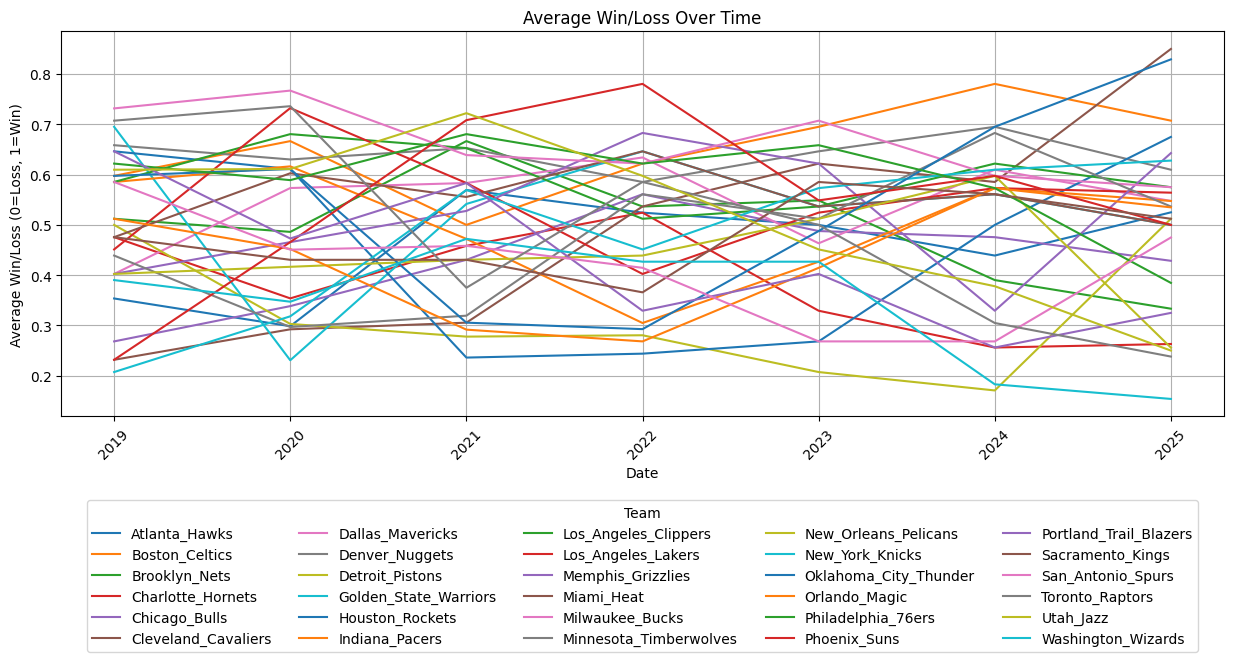

In [189]:
# Group by Date and Team to calculate the mean Win_Loss
average_win_loss = nba_df.groupby([nba_df['Season'], 'Team'])['Win_Loss'].mean().unstack()

# Plotting the result
fig, ax = plt.subplots(figsize=(15, 5))
average_win_loss.plot(ax=ax)
ax.set(
    title="Average Win/Loss Over Time",
    xlabel="Date",
    ylabel="Average Win/Loss (0=Loss, 1=Win)",
)

# Obtain current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Map the team indices to the full team names
team_fullnames = {str(i): team for i, team in enumerate(teams_dict.values())}

# Map the codes to full team names
mapped_labels = [team_fullnames[label] for label in labels]  

# Adjust ncol for your number of teams
plt.legend(handles=handles, labels=mapped_labels, title='Team', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)

ax.grid(True)
plt.xticks(rotation=45)
plt.show()

### Overview

In [190]:
nba_df

,Season,Team,Game_of_Season,Date,Home,Opponent,Win_Loss,Points,Opponent_Points,Field_Goals,...,Opponent_Free_Throws_Attempts,Opponent_Free_Throws_Percentage,Opponent_Offensive_Rebounds,Opponent_Total_Rebounds,Opponent_Assists,Opponent_Steals,Opponent_Blocks,Opponent_Turnovers,Opponent_Personal_Fouls,Time_Scale
0,2019,0,1,2018-10-17,0,19,0,107,126,41,...,31,0.774,10,46,21,12,6,16,23,0.000436
1,2019,0,2,2018-10-19,0,14,0,117,131,41,...,43,0.698,7,41,32,9,4,17,29,0.001308
2,2019,0,3,2018-10-21,0,5,1,133,111,48,...,14,0.643,15,49,23,5,2,18,25,0.002181
3,2019,0,4,2018-10-24,1,6,1,111,104,37,...,26,0.615,9,52,25,7,9,17,27,0.003489
4,2019,0,5,2018-10-27,1,4,0,85,97,27,...,16,0.813,8,52,25,14,6,23,21,0.004797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15335,2025,29,35,2025-01-08,0,22,0,103,109,42,...,19,0.737,10,36,21,8,11,9,14,0.992586
15336,2025,29,36,2025-01-10,0,4,0,105,138,39,...,14,0.643,11,55,39,11,7,15,12,0.993458
15337,2025,29,37,2025-01-12,1,20,0,95,136,28,...,35,0.943,15,56,26,11,4,13,22,0.994331
15338,2025,29,38,2025-01-13,1,17,0,106,120,40,...,31,0.774,14,53,20,8,6,19,15,0.994767


### Save as CSV

In [191]:
# Define filename
filename = 'preprocessed_nba_game_stats.csv'

# Define the full file path for the target CSV
csv_file_path = os.path.join(data_file_path, filename)

# Write the DataFrame to the file
nba_df.to_csv(csv_file_path, index=False)